In [15]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [16]:
def f(t, A1=0.3, A2=23.8, A3=1.59, tau1=3.9, tau2=1.13, tau3=22.20, tau4=0.251):
    """Computes the value of the function f(t) that represents a photon with given parameters, only for t >= 0."""
    if t < 0:
        return 0 # Esto me asegura que no puede haber un offset negativo
    term1 = A1 * (1 - np.exp(-t / tau1))
    term2 = A2 * np.exp(-t / tau2)
    term3 = A3 * np.exp(-t / tau3)
    term4 = np.exp(-t / tau4)
    return term1 * (term2 + term3 + term4)

def sum_functions(t, offsets):
    """Sums multiple instances of photon-signals with different time offsets."""
    return sum(f(t - offset) for offset in offsets)

## Pruebas iniciales sampleando random (equiprobable) o con una gaussiana

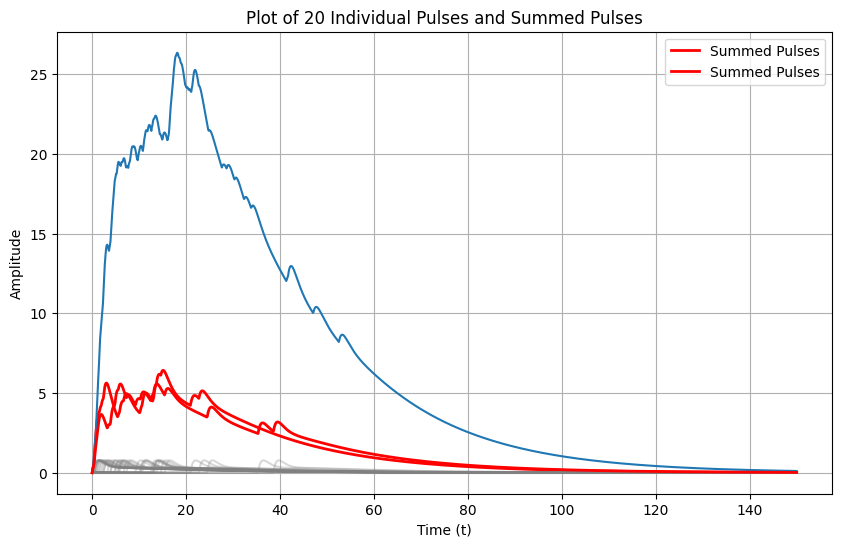

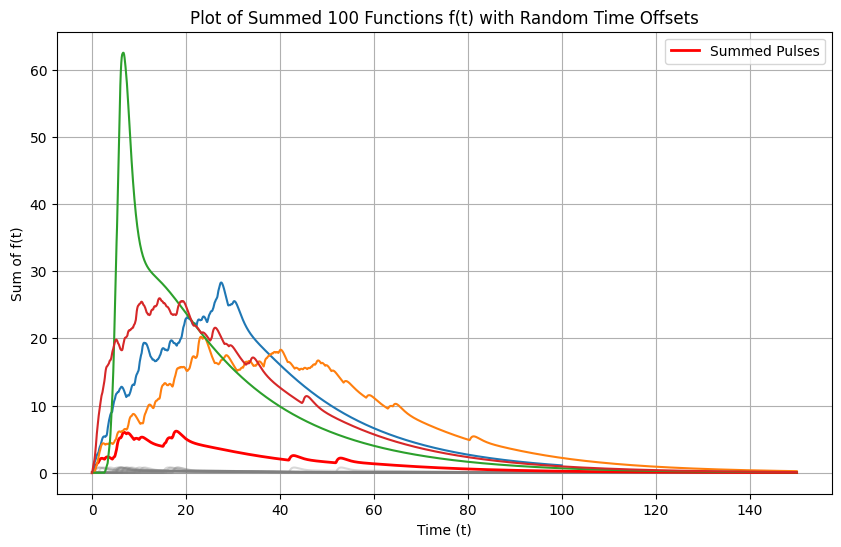

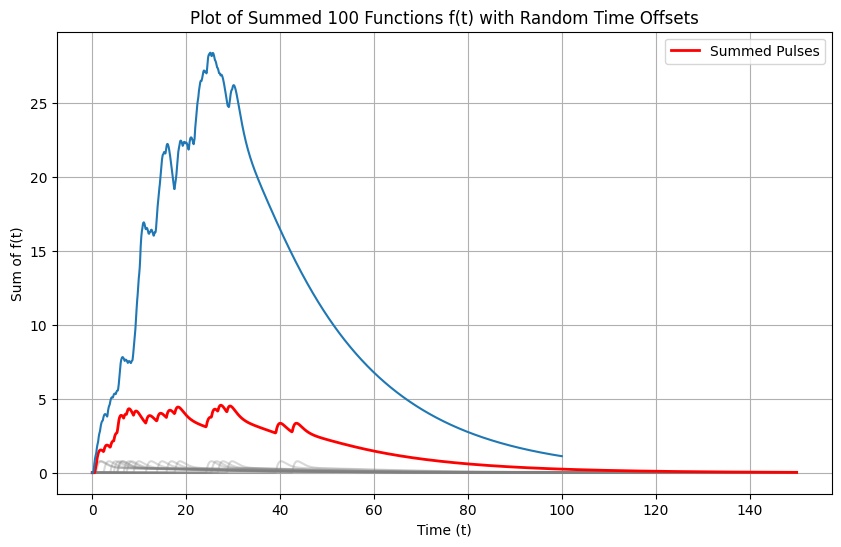

In [17]:
def generate_offsets(n, lower_bound=0, upper_bound=30):
    return [random.uniform(lower_bound, upper_bound) for _ in range(n)]

n_functions = 100  # Number of functions to sum

# Generate random offsets for each function instance
random_offsets = generate_offsets(n_functions)

# Generate time points from 0 to 15 seconds, at intervals of 0.1 seconds
t_values = np.linspace(0, 100, 1500)
# Evaluate the sum of the functions at each time point
summed_values = [sum_functions(t, random_offsets) for t in t_values]

# Plot the resulting function
plt.plot(t_values, summed_values)
plt.title(f'Plot of Summed {n_functions} Functions f(t) with Random Time Offsets')
plt.xlabel('Time (t)')
plt.ylabel('Sum of f(t)')
plt.grid(True)
plt.show()


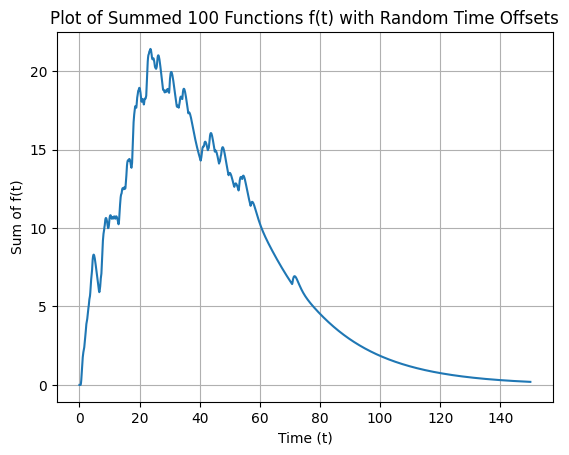

In [18]:
def generate_offsets(n, loc_1, scale_1):
    """Generate n random offsets using a half-normal distribution with a given scale.
    The 'scale' parameter here is the standard deviation of the underlying normal distribution."""
    return np.abs(np.random.normal(loc=loc_1, scale=scale_1, size=n))

n_functions = 100  # Number of functions to sum
scale = 20  # Modify this value to change the spread of the half-normal distribution
loc = 20

# Generate random offsets for each function instance
random_offsets = generate_offsets(n_functions, loc, scale)

# Generate time points from 0 to 150 seconds, at intervals of 0.1 seconds
t_values = np.linspace(0, 150, 1500)
# Evaluate the sum of the functions at each time point
summed_values = [sum_functions(t, random_offsets) for t in t_values]

# Plot the resulting function
plt.plot(t_values, summed_values)
plt.title(f'Plot of Summed {n_functions} Functions f(t) with Random Time Offsets')
plt.xlabel('Time (t)')
plt.ylabel('Sum of f(t)')
plt.grid(True)
plt.show()


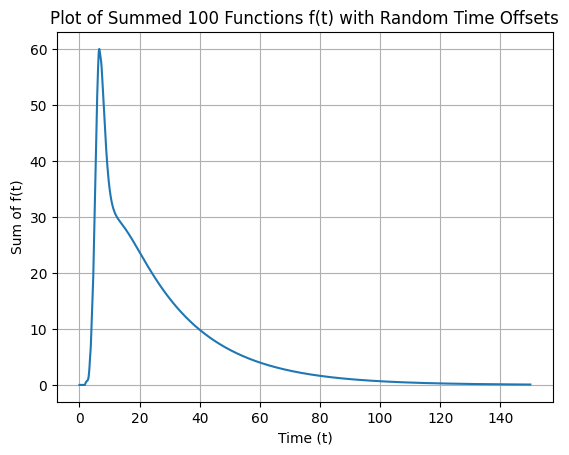

In [19]:
def generate_offsets(n, mu, scale=1):
    """Generate n random offsets using a truncated normal distribution that is non-negative."""
    lower, upper = 0, np.inf  # Lower and upper bounds for truncation
    mu, sigma = mu, scale  # Mean and standard deviation of the underlying normal distribution
    return stats.truncnorm(
        (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma).rvs(n)

n_functions = 100  # Number of functions to sum
scale = 5  # Standard deviation of the underlying normal distribution
mu = 0

# Generate random offsets for each function instance
random_offsets = generate_offsets(n_functions, scale)

# Generate time points from 0 to 150 seconds, at intervals of 0.1 seconds
t_values = np.linspace(0, 150, 1500)
# Evaluate the sum of the functions at each time point
summed_values = [sum_functions(t, random_offsets) for t in t_values]

# Plot the resulting function
plt.plot(t_values, summed_values)
plt.title(f'Plot of Summed {n_functions} Functions f(t) with Random Time Offsets')
plt.xlabel('Time (t)')
plt.ylabel('Sum of f(t)')
plt.grid(True)
plt.show()

## Sampleo de una exponencial decreciente

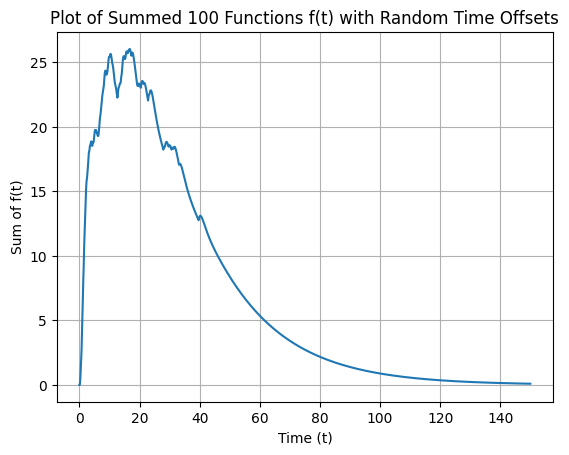

In [20]:
def generate_offsets(n, rate=1):
    """Generate n random offsets using an exponential distribution with a given rate."""
    return np.random.exponential(scale=1/rate, size=n)

n_functions = 100  # Number of functions to sum
lambda_rate = 0.1  # Rate parameter for the exponential distribution

# Generate random offsets for each function instance
random_offsets = generate_offsets(n_functions, rate=lambda_rate)

# Generate time points from 0 to 150 seconds, at intervals of 0.1 seconds
t_values = np.linspace(0, 150, 1500)
# Evaluate the sum of the functions at each time point
summed_values = [sum_functions(t, random_offsets) for t in t_values]

# Plot the resulting function
plt.plot(t_values, summed_values)
plt.title(f'Plot of Summed {n_functions} Functions f(t) with Random Time Offsets')
plt.xlabel('Time (t)')
plt.ylabel('Sum of f(t)')
plt.grid(True)
plt.show()


## Plot of the sum + individual pulses

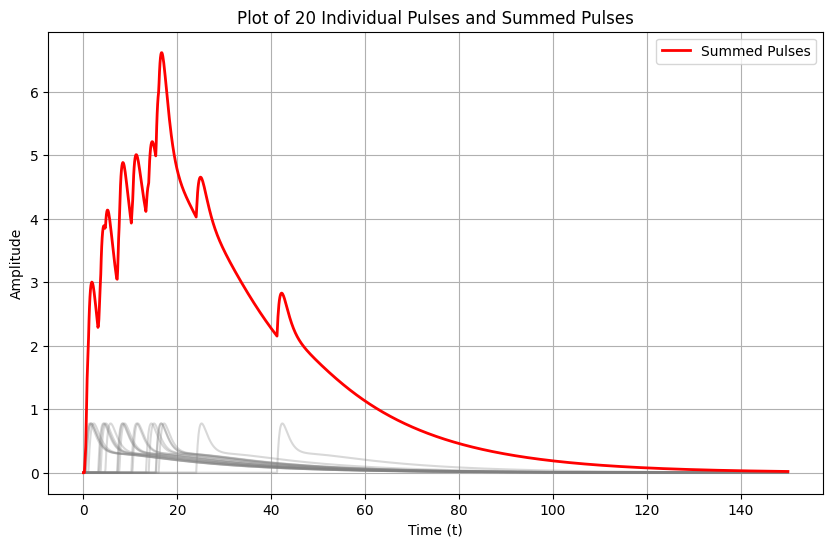

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, A1=0.3, A2=23.8, A3=1.59, tau1=3.9, tau2=1.13, tau3=22.20, tau4=0.251):
    """Computes the value of the function f(t) for t >= 0."""
    if t < 0:
        return 0
    term1 = A1 * (1 - np.exp(-t / tau1))
    term2 = A2 * np.exp(-t / tau2)
    term3 = A3 * np.exp(-t / tau3)
    term4 = np.exp(-t / tau4)
    return term1 * (term2 + term3 + term4)

def generate_offsets(n, rate=1):
    """Generate n random offsets using an exponential distribution with a given rate."""
    return np.random.exponential(scale=1/rate, size=n)

n_functions = 20  # Number of functions to sum
lambda_rate = 0.1  # Rate parameter for the exponential distribution

# Generate random offsets for each function instance
random_offsets = generate_offsets(n_functions, rate=lambda_rate)

# Generate time points from 0 to 150 seconds, at intervals of 0.1 seconds
t_values = np.linspace(0, 150, 1500)
# Evaluate the sum of the functions at each time point
summed_values = np.zeros_like(t_values)

plt.figure(figsize=(10, 6))  # Set figure size for better visibility

# Plot each individual pulse
for offset in random_offsets:
    individual_values = [f(t - offset) for t in t_values]
    plt.plot(t_values, individual_values, color='gray', alpha=0.3)  # Light gray, semi-transparent
    summed_values += np.array(individual_values)  # Sum the values to get the total

# Plot the resulting summed function
plt.plot(t_values, summed_values, color='red', label='Summed Pulses', linewidth=2)
plt.title(f'Plot of {n_functions} Individual Pulses and Summed Pulses')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()
